In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [2]:
nba = pd.read_csv(r'C:\Users\HP Probook\Documents\Programming files\Python codes\ML\datasets\nba2020.csv')
nba.head(10)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State
5,Stephen Curry,95,#30,Golden State Warriors,G,03/14/88,6-3 / 1.91,185 lbs. / 83.9 kg.,$40231758,USA,2009,1,7,Davidson
6,Anthony Davis,94,#3,Los Angeles Lakers,F-C,03/11/93,6-10 / 2.08,222 lbs. / 100.7 kg.,$27093019,USA,2012,1,1,Kentucky
7,Paul George,93,#13,Los Angeles Clippers,F,05/02/90,6-8 / 2.03,210 lbs. / 95.3 kg.,$33005556,USA,2010,1,10,Fresno State
8,Damian Lillard,92,#0,Portland Trail Blazers,G,07/15/90,6-2 / 1.88,195 lbs. / 88.5 kg.,$29802321,USA,2012,1,6,Weber State
9,Joel Embiid,91,#21,Philadelphia 76ers,C,03/16/94,7-0 / 2.13,250 lbs. / 113.4 kg.,$27504630,Cameroon,2014,1,3,Kansas


In [3]:
nba.tail(10)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
419,Miye Oni,69,#24,Utah Jazz,F,08/04/97,6-5 / 1.96,210 lbs. / 95.3 kg.,$898310,USA,2019,2,58,Yale
420,Malcolm Miller,69,#13,Toronto Raptors,F,03/06/93,6-7 / 2.01,205 lbs. / 93 kg.,$1588231,USA,2015,Undrafted,Undrafted,Holy Cross
421,Isaac Bonga,68,#17,Washington Wizards,G,11/08/99,6-8 / 2.03,200 lbs. / 90.7 kg.,$1416852,Germany,2018,2,39,NaN
422,Isaiah Hartenstein,68,#0,NaN,F-C,05/05/98,7-0 / 2.13,250 lbs. / 113.4 kg.,$1416852,Germany,2017,2,43,NaN
423,Jordan McRae,68,#0,Detroit Pistons,G,03/28/91,6-5 / 1.96,179 lbs. / 81.2 kg.,$1254933,USA,2014,2,58,Tennessee
424,Brandon Goodwin,68,#0,Atlanta Hawks,G,10/02/95,6-0 / 1.83,180 lbs. / 81.6 kg.,$522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast
425,Michael Frazier,68,#21,Houston Rockets,G,03/08/94,6-3 / 1.91,200 lbs. / 90.7 kg.,$79568,USA,2015,2,60,Florida
426,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,11/20/97,6-10 / 2.08,200 lbs. / 90.7 kg.,$79568,Greece,2018,Undrafted,Undrafted,Dayton
427,Jalen Lecque,68,#0,Phoenix Suns,G,06/13/00,6-3 / 1.91,190 lbs. / 86.2 kg.,$898310,USA,2019,Undrafted,Undrafted,NaN
428,Duncan Robinson,67,#55,Miami Heat,F,04/22/94,6-7 / 2.01,215 lbs. / 97.5 kg.,$1416852,USA,2018,Undrafted,Undrafted,Michigan


In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.0+ KB


We have missing values in 'team' and 'college' features. 

In [5]:
nba.describe()

,rating,draft_year
count,429.000000,429.000000
mean,76.372960,2014.093240
std,5.657748,3.937678
min,67.000000,2001.000000
25%,72.000000,2012.000000
50%,75.000000,2015.000000
75%,79.000000,2017.000000
max,97.000000,2019.000000


## Exploratory Data Analysis

As we understand from above, pandas understood the dataset to have two numerical attributes - rating and draft_year. 
We have other attributes with numerical values but taken as a categorical data - like the salary column. Let's clean the dataset first

In [6]:
nba['college'].value_counts()

Kentucky          26
Duke              24
North Carolina    13
UCLA              12
Texas             11
                  ..
Yale               1
Colorado           1
Missouri           1
Auburn             1
New Mexico         1
Name: college, Length: 111, dtype: int64

Let's drop the college and team column since it's doubtful at this stage that it'll assist in predicting the feature - salary. But's let's copy the dataset in case

In [7]:
nba_temp = nba.copy()

In [8]:
nba.drop('college', axis=1, inplace=True)

In [9]:
nba.drop('team', axis=1, inplace=True)

In [10]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   position     429 non-null    object
 4   b_day        429 non-null    object
 5   height       429 non-null    object
 6   weight       429 non-null    object
 7   salary       429 non-null    object
 8   country      429 non-null    object
 9   draft_year   429 non-null    int64 
 10  draft_round  429 non-null    object
 11  draft_peak   429 non-null    object
dtypes: int64(2), object(10)
memory usage: 40.3+ KB


Let's get the age of the players

In [11]:
from datetime import datetime, date

nba['b_day'] = pd.to_datetime(nba['b_day']) # converts from categorical data to numerical data

today = date.today()
nba['age'] = today.year - nba['b_day'].dt.year

Let's get the number of years each player has played

In [12]:
nba['years_played'] = today.year - nba['draft_year']

In [13]:
nba.head(10)

,full_name,rating,jersey,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,age,years_played
0,LeBron James,97,#23,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,37,18
1,Kawhi Leonard,97,#2,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,30,10
2,Giannis Antetokounmpo,96,#34,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,27,8
3,Kevin Durant,96,#7,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,33,14
4,James Harden,96,#13,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,32,12
5,Stephen Curry,95,#30,G,1988-03-14,6-3 / 1.91,185 lbs. / 83.9 kg.,$40231758,USA,2009,1,7,33,12
6,Anthony Davis,94,#3,F-C,1993-03-11,6-10 / 2.08,222 lbs. / 100.7 kg.,$27093019,USA,2012,1,1,28,9
7,Paul George,93,#13,F,1990-05-02,6-8 / 2.03,210 lbs. / 95.3 kg.,$33005556,USA,2010,1,10,31,11
8,Damian Lillard,92,#0,G,1990-07-15,6-2 / 1.88,195 lbs. / 88.5 kg.,$29802321,USA,2012,1,6,31,9
9,Joel Embiid,91,#21,C,1994-03-16,7-0 / 2.13,250 lbs. / 113.4 kg.,$27504630,Cameroon,2014,1,3,27,7


In [14]:
nba.drop('b_day', axis=1, inplace=True)

In [15]:
nba.head(10)

,full_name,rating,jersey,position,height,weight,salary,country,draft_year,draft_round,draft_peak,age,years_played
0,LeBron James,97,#23,F,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,37,18
1,Kawhi Leonard,97,#2,F,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,30,10
2,Giannis Antetokounmpo,96,#34,F-G,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,27,8
3,Kevin Durant,96,#7,F,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,33,14
4,James Harden,96,#13,G,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,32,12
5,Stephen Curry,95,#30,G,6-3 / 1.91,185 lbs. / 83.9 kg.,$40231758,USA,2009,1,7,33,12
6,Anthony Davis,94,#3,F-C,6-10 / 2.08,222 lbs. / 100.7 kg.,$27093019,USA,2012,1,1,28,9
7,Paul George,93,#13,F,6-8 / 2.03,210 lbs. / 95.3 kg.,$33005556,USA,2010,1,10,31,11
8,Damian Lillard,92,#0,G,6-2 / 1.88,195 lbs. / 88.5 kg.,$29802321,USA,2012,1,6,31,9
9,Joel Embiid,91,#21,C,7-0 / 2.13,250 lbs. / 113.4 kg.,$27504630,Cameroon,2014,1,3,27,7


In [16]:
nba['salary'] = nba['salary'].str[1:]

In [17]:
nba['salary'].head(10)

0    37436858
1    32742000
2    25842697
3    37199000
4    38199000
5    40231758
6    27093019
7    33005556
8    29802321
9    27504630
Name: salary, dtype: object

In [18]:
nba['salary'] = pd.to_numeric(nba['salary'])

In [19]:
nba.describe()

,rating,salary,draft_year,age,years_played
count,429.000000,4.290000e+02,429.000000,429.000000,429.000000
mean,76.372960,8.530080e+06,2014.093240,27.825175,6.906760
std,5.657748,9.218059e+06,3.937678,4.115133,3.937678
min,67.000000,5.000000e+04,2001.000000,21.000000,2.000000
25%,72.000000,2.000000e+06,2012.000000,25.000000,4.000000
50%,75.000000,4.380120e+06,2015.000000,27.000000,6.000000
75%,79.000000,1.220000e+07,2017.000000,31.000000,9.000000
max,97.000000,4.023176e+07,2019.000000,41.000000,20.000000


In [20]:
nba['draft_round'].value_counts()

1            257
2            105
Undrafted     67
Name: draft_round, dtype: int64

In [21]:
nba['draft_round'] = nba['draft_round'].replace('Undrafted', 0)

In [22]:
nba['draft_round'].value_counts()

1    257
2    105
0     67
Name: draft_round, dtype: int64

In [23]:
nba['draft_peak'] = nba['draft_peak'].replace('Undrafted', 0)

In [24]:
nba['draft_peak'].value_counts()

0     67
2     15
9     13
3     12
1     12
7     11
4     11
5     11
12    10
11    10
15     9
10     9
6      9
8      9
24     9
19     8
14     8
23     8
13     8
18     8
31     7
35     7
26     7
27     7
22     7
20     7
46     7
21     6
33     6
28     6
30     6
38     6
40     6
16     6
45     5
25     5
17     5
34     5
42     5
29     5
32     5
47     5
41     4
39     4
36     4
43     3
51     3
58     3
60     3
50     3
37     3
48     3
44     2
49     2
55     2
52     1
54     1
Name: draft_peak, dtype: int64

Now let's deal with the height and weight columns and also calculate the bmi:

In [25]:
nba.head(10)

,full_name,rating,jersey,position,height,weight,salary,country,draft_year,draft_round,draft_peak,age,years_played
0,LeBron James,97,#23,F,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858,USA,2003,1,1,37,18
1,Kawhi Leonard,97,#2,F,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000,USA,2011,1,15,30,10
2,Giannis Antetokounmpo,96,#34,F-G,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697,Greece,2013,1,15,27,8
3,Kevin Durant,96,#7,F,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000,USA,2007,1,2,33,14
4,James Harden,96,#13,G,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000,USA,2009,1,3,32,12
5,Stephen Curry,95,#30,G,6-3 / 1.91,185 lbs. / 83.9 kg.,40231758,USA,2009,1,7,33,12
6,Anthony Davis,94,#3,F-C,6-10 / 2.08,222 lbs. / 100.7 kg.,27093019,USA,2012,1,1,28,9
7,Paul George,93,#13,F,6-8 / 2.03,210 lbs. / 95.3 kg.,33005556,USA,2010,1,10,31,11
8,Damian Lillard,92,#0,G,6-2 / 1.88,195 lbs. / 88.5 kg.,29802321,USA,2012,1,6,31,9
9,Joel Embiid,91,#21,C,7-0 / 2.13,250 lbs. / 113.4 kg.,27504630,Cameroon,2014,1,3,27,7


In [26]:
def weight_to_kg_numeric(column):
    start = column.find('/') + 1
    end = column.find('kg')
    
    return float(column[start:end])

In [27]:
def height_to_m_numeric(column):
    start = column.find('/') + 1
    end = column.find('kg')
    
    return float(column[start:end])

In [28]:
weight_to_kg_numeric(nba['weight'])

nba.head(10)

AttributeError: 'Series' object has no attribute 'find'

Since that didn't work, let's use a custom transformer 

In [29]:
from sklearn.base import  BaseEstimator, TransformerMixin

class Attribs_transformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_bmi = True):
        self.add_bmi = add_bmi
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        X["weight_in_kg"] = X["weight"].transform(lambda x: weight_to_kg_numeric(x))
        X["height_in_mts"] = X["height"].transform(lambda x: height_to_m_numeric(x))
        
        if self.add_bmi:
            X["bmi"] = X["weight_in_kg"] / X["height_in_mts"]**2
            
        return X


In [30]:
columns_transformer = Attribs_transformer()
nba = columns_transformer.transform(nba)
nba.head(10)

,full_name,rating,jersey,position,height,weight,salary,country,draft_year,draft_round,draft_peak,age,years_played,weight_in_kg,height_in_mts,bmi
0,LeBron James,97,#23,F,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858,USA,2003,1,1,37,18,113.4,2.0,28.350000
1,Kawhi Leonard,97,#2,F,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000,USA,2011,1,15,30,10,102.1,2.0,25.525000
2,Giannis Antetokounmpo,96,#34,F-G,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697,Greece,2013,1,15,27,8,109.8,2.1,24.897959
3,Kevin Durant,96,#7,F,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000,USA,2007,1,2,33,14,104.3,2.0,26.075000
4,James Harden,96,#13,G,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000,USA,2009,1,3,32,12,99.8,1.9,27.645429
5,Stephen Curry,95,#30,G,6-3 / 1.91,185 lbs. / 83.9 kg.,40231758,USA,2009,1,7,33,12,83.9,1.9,23.240997
6,Anthony Davis,94,#3,F-C,6-10 / 2.08,222 lbs. / 100.7 kg.,27093019,USA,2012,1,1,28,9,100.7,2.0,25.175000
7,Paul George,93,#13,F,6-8 / 2.03,210 lbs. / 95.3 kg.,33005556,USA,2010,1,10,31,11,95.3,2.0,23.825000
8,Damian Lillard,92,#0,G,6-2 / 1.88,195 lbs. / 88.5 kg.,29802321,USA,2012,1,6,31,9,88.5,1.8,27.314815
9,Joel Embiid,91,#21,C,7-0 / 2.13,250 lbs. / 113.4 kg.,27504630,Cameroon,2014,1,3,27,7,113.4,2.1,25.714286


In [31]:
nba.drop(['height', 'weight'], axis=1, inplace=True)

In [32]:
nba.head(10)

,full_name,rating,jersey,position,salary,country,draft_year,draft_round,draft_peak,age,years_played,weight_in_kg,height_in_mts,bmi
0,LeBron James,97,#23,F,37436858,USA,2003,1,1,37,18,113.4,2.0,28.350000
1,Kawhi Leonard,97,#2,F,32742000,USA,2011,1,15,30,10,102.1,2.0,25.525000
2,Giannis Antetokounmpo,96,#34,F-G,25842697,Greece,2013,1,15,27,8,109.8,2.1,24.897959
3,Kevin Durant,96,#7,F,37199000,USA,2007,1,2,33,14,104.3,2.0,26.075000
4,James Harden,96,#13,G,38199000,USA,2009,1,3,32,12,99.8,1.9,27.645429
5,Stephen Curry,95,#30,G,40231758,USA,2009,1,7,33,12,83.9,1.9,23.240997
6,Anthony Davis,94,#3,F-C,27093019,USA,2012,1,1,28,9,100.7,2.0,25.175000
7,Paul George,93,#13,F,33005556,USA,2010,1,10,31,11,95.3,2.0,23.825000
8,Damian Lillard,92,#0,G,29802321,USA,2012,1,6,31,9,88.5,1.8,27.314815
9,Joel Embiid,91,#21,C,27504630,Cameroon,2014,1,3,27,7,113.4,2.1,25.714286


In [33]:
nba.describe()

,rating,salary,draft_year,age,years_played,weight_in_kg,height_in_mts,bmi
count,429.000000,4.290000e+02,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,76.372960,8.530080e+06,2014.093240,27.825175,6.906760,97.219814,1.952681,25.479151
std,5.657748,9.218059e+06,3.937678,4.115133,3.937678,10.536428,0.086864,2.026510
min,67.000000,5.000000e+04,2001.000000,21.000000,2.000000,77.100000,1.700000,20.525000
25%,72.000000,2.000000e+06,2012.000000,25.000000,4.000000,89.400000,1.900000,24.127424
50%,75.000000,4.380120e+06,2015.000000,27.000000,6.000000,96.600000,2.000000,25.263158
75%,79.000000,1.220000e+07,2017.000000,31.000000,9.000000,104.300000,2.000000,26.650000
max,97.000000,4.023176e+07,2019.000000,41.000000,20.000000,131.500000,2.200000,35.678670


In [34]:
nba.rename(columns={'height_in_mts': 'height_in_m'}, inplace=True)

In [35]:
nba.head(10)

,full_name,rating,jersey,position,salary,country,draft_year,draft_round,draft_peak,age,years_played,weight_in_kg,height_in_m,bmi
0,LeBron James,97,#23,F,37436858,USA,2003,1,1,37,18,113.4,2.0,28.350000
1,Kawhi Leonard,97,#2,F,32742000,USA,2011,1,15,30,10,102.1,2.0,25.525000
2,Giannis Antetokounmpo,96,#34,F-G,25842697,Greece,2013,1,15,27,8,109.8,2.1,24.897959
3,Kevin Durant,96,#7,F,37199000,USA,2007,1,2,33,14,104.3,2.0,26.075000
4,James Harden,96,#13,G,38199000,USA,2009,1,3,32,12,99.8,1.9,27.645429
5,Stephen Curry,95,#30,G,40231758,USA,2009,1,7,33,12,83.9,1.9,23.240997
6,Anthony Davis,94,#3,F-C,27093019,USA,2012,1,1,28,9,100.7,2.0,25.175000
7,Paul George,93,#13,F,33005556,USA,2010,1,10,31,11,95.3,2.0,23.825000
8,Damian Lillard,92,#0,G,29802321,USA,2012,1,6,31,9,88.5,1.8,27.314815
9,Joel Embiid,91,#21,C,27504630,Cameroon,2014,1,3,27,7,113.4,2.1,25.714286


In [36]:
nba['draft_round'] = pd.to_numeric(nba['draft_round'])
nba['draft_peak'] = pd.to_numeric(nba['draft_peak'])

In [39]:
nba.describe()

,rating,salary,draft_year,draft_round,draft_peak,age,years_played,weight_in_kg,height_in_m,bmi
count,429.000000,4.290000e+02,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,76.372960,8.530080e+06,2014.093240,1.088578,18.207459,27.825175,6.906760,97.219814,1.952681,25.479151
std,5.657748,9.218059e+06,3.937678,0.627698,16.051795,4.115133,3.937678,10.536428,0.086864,2.026510
min,67.000000,5.000000e+04,2001.000000,0.000000,0.000000,21.000000,2.000000,77.100000,1.700000,20.525000
25%,72.000000,2.000000e+06,2012.000000,1.000000,4.000000,25.000000,4.000000,89.400000,1.900000,24.127424
50%,75.000000,4.380120e+06,2015.000000,1.000000,14.000000,27.000000,6.000000,96.600000,2.000000,25.263158
75%,79.000000,1.220000e+07,2017.000000,1.000000,30.000000,31.000000,9.000000,104.300000,2.000000,26.650000
max,97.000000,4.023176e+07,2019.000000,2.000000,60.000000,41.000000,20.000000,131.500000,2.200000,35.678670


### splitting the dataset

In [40]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(nba, test_size=0.2, random_state=42)

train.head(10)

,full_name,rating,jersey,position,salary,country,draft_year,draft_round,draft_peak,age,years_played,weight_in_kg,height_in_m,bmi
66,Spencer Dinwiddie,82,#8,G,10605600,USA,2014,2,38,28,7,93.0,1.9,25.761773
132,Terry Rozier,78,#3,G,19894737,USA,2015,1,16,27,6,86.2,1.8,26.604938
225,Robin Lopez,75,#42,C,4767000,USA,2008,1,15,33,13,115.7,2.1,26.235828
31,De'Aaron Fox,86,#5,G,6392760,USA,2017,1,5,24,4,77.6,1.9,21.495845
84,Reggie Jackson,80,#0,G,17799677,USA,2011,1,24,31,10,94.3,1.9,26.121884
407,Ignas Brazdeikis,70,#17,F,898310,Canada,2019,2,47,22,2,98.0,1.9,27.146814
168,Michael Beasley,76,#0,F,3500000,USA,2008,1,2,32,13,106.6,2.0,26.650000
227,Boban Marjanovic,75,#51,C,3500000,Serbia,2010,0,0,33,11,131.5,2.2,27.169421
415,Gary Clark,69,#0,F,1427191,USA,2018,0,0,27,3,102.1,1.9,28.282548
399,Caleb Swanigan,70,#50,C,2033160,USA,2017,1,26,24,4,112.9,2.0,28.225000


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 66 to 102
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   full_name     343 non-null    object 
 1   rating        343 non-null    int64  
 2   jersey        343 non-null    object 
 3   position      343 non-null    object 
 4   salary        343 non-null    int64  
 5   country       343 non-null    object 
 6   draft_year    343 non-null    int64  
 7   draft_round   343 non-null    int64  
 8   draft_peak    343 non-null    int64  
 9   age           343 non-null    int64  
 10  years_played  343 non-null    int64  
 11  weight_in_kg  343 non-null    float64
 12  height_in_m   343 non-null    float64
 13  bmi           343 non-null    float64
dtypes: float64(3), int64(7), object(4)
memory usage: 40.2+ KB


In [42]:
train.describe()

,rating,salary,draft_year,draft_round,draft_peak,age,years_played,weight_in_kg,height_in_m,bmi
count,343.000000,3.430000e+02,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,76.224490,8.243554e+06,2014.104956,1.078717,18.148688,27.839650,6.895044,96.942857,1.949563,25.487465
std,5.546643,9.016159e+06,3.885880,0.623316,15.914558,4.115362,3.885880,10.263562,0.086812,1.919308
min,67.000000,5.000000e+04,2001.000000,0.000000,0.000000,21.000000,2.000000,77.100000,1.700000,20.619835
25%,72.000000,2.028594e+06,2012.000000,1.000000,4.000000,25.000000,4.000000,89.400000,1.900000,24.375000
50%,75.000000,4.102564e+06,2015.000000,1.000000,15.000000,27.000000,6.000000,96.200000,1.900000,25.263158
75%,78.000000,1.129387e+07,2017.000000,1.000000,29.500000,31.000000,9.000000,104.100000,2.000000,26.649100
max,97.000000,4.023176e+07,2019.000000,2.000000,60.000000,41.000000,20.000000,131.500000,2.200000,32.049861


## Looking for Insights

In [43]:
corr_matrix = train.corr()
corr_matrix

,rating,salary,draft_year,draft_round,draft_peak,age,years_played,weight_in_kg,height_in_m,bmi
rating,1.000000,0.774230,-0.358698,0.016863,-0.225063,0.235869,0.358698,0.088261,0.100096,-0.002561
salary,0.774230,1.000000,-0.485083,0.012528,-0.176921,0.395657,0.485083,0.019004,0.069864,-0.063790
draft_year,-0.358698,-0.485083,1.000000,0.070218,0.138707,-0.914253,-1.000000,-0.033185,-0.000730,-0.030735
draft_round,0.016863,0.012528,0.070218,1.000000,0.850089,-0.080556,-0.070218,0.078267,0.051972,0.051669
draft_peak,-0.225063,-0.176921,0.138707,0.850089,1.000000,-0.065665,-0.138707,0.012008,-0.015297,0.036162
age,0.235869,0.395657,-0.914253,-0.080556,-0.065665,1.000000,0.914253,0.016680,-0.030070,0.045772
years_played,0.358698,0.485083,-1.000000,-0.070218,-0.138707,0.914253,1.000000,0.033185,0.000730,0.030735
weight_in_kg,0.088261,0.019004,-0.033185,0.078267,0.012008,0.016680,0.033185,1.000000,0.706581,0.561388
height_in_m,0.100096,0.069864,-0.000730,0.051972,-0.015297,-0.030070,0.000730,0.706581,1.000000,-0.186117
bmi,-0.002561,-0.063790,-0.030735,0.051669,0.036162,0.045772,0.030735,0.561388,-0.186117,1.000000


In [44]:
corr_matrix['salary']

rating          0.774230
salary          1.000000
draft_year     -0.485083
draft_round     0.012528
draft_peak     -0.176921
age             0.395657
years_played    0.485083
weight_in_kg    0.019004
height_in_m     0.069864
bmi            -0.063790
Name: salary, dtype: float64

The features with interesting correlations with target, salary are : rating, age, years_played and draft_peak (negatively correlated). bmi does not have enough correlation with the target to be considered. Let's visualize this before we move on to the next step

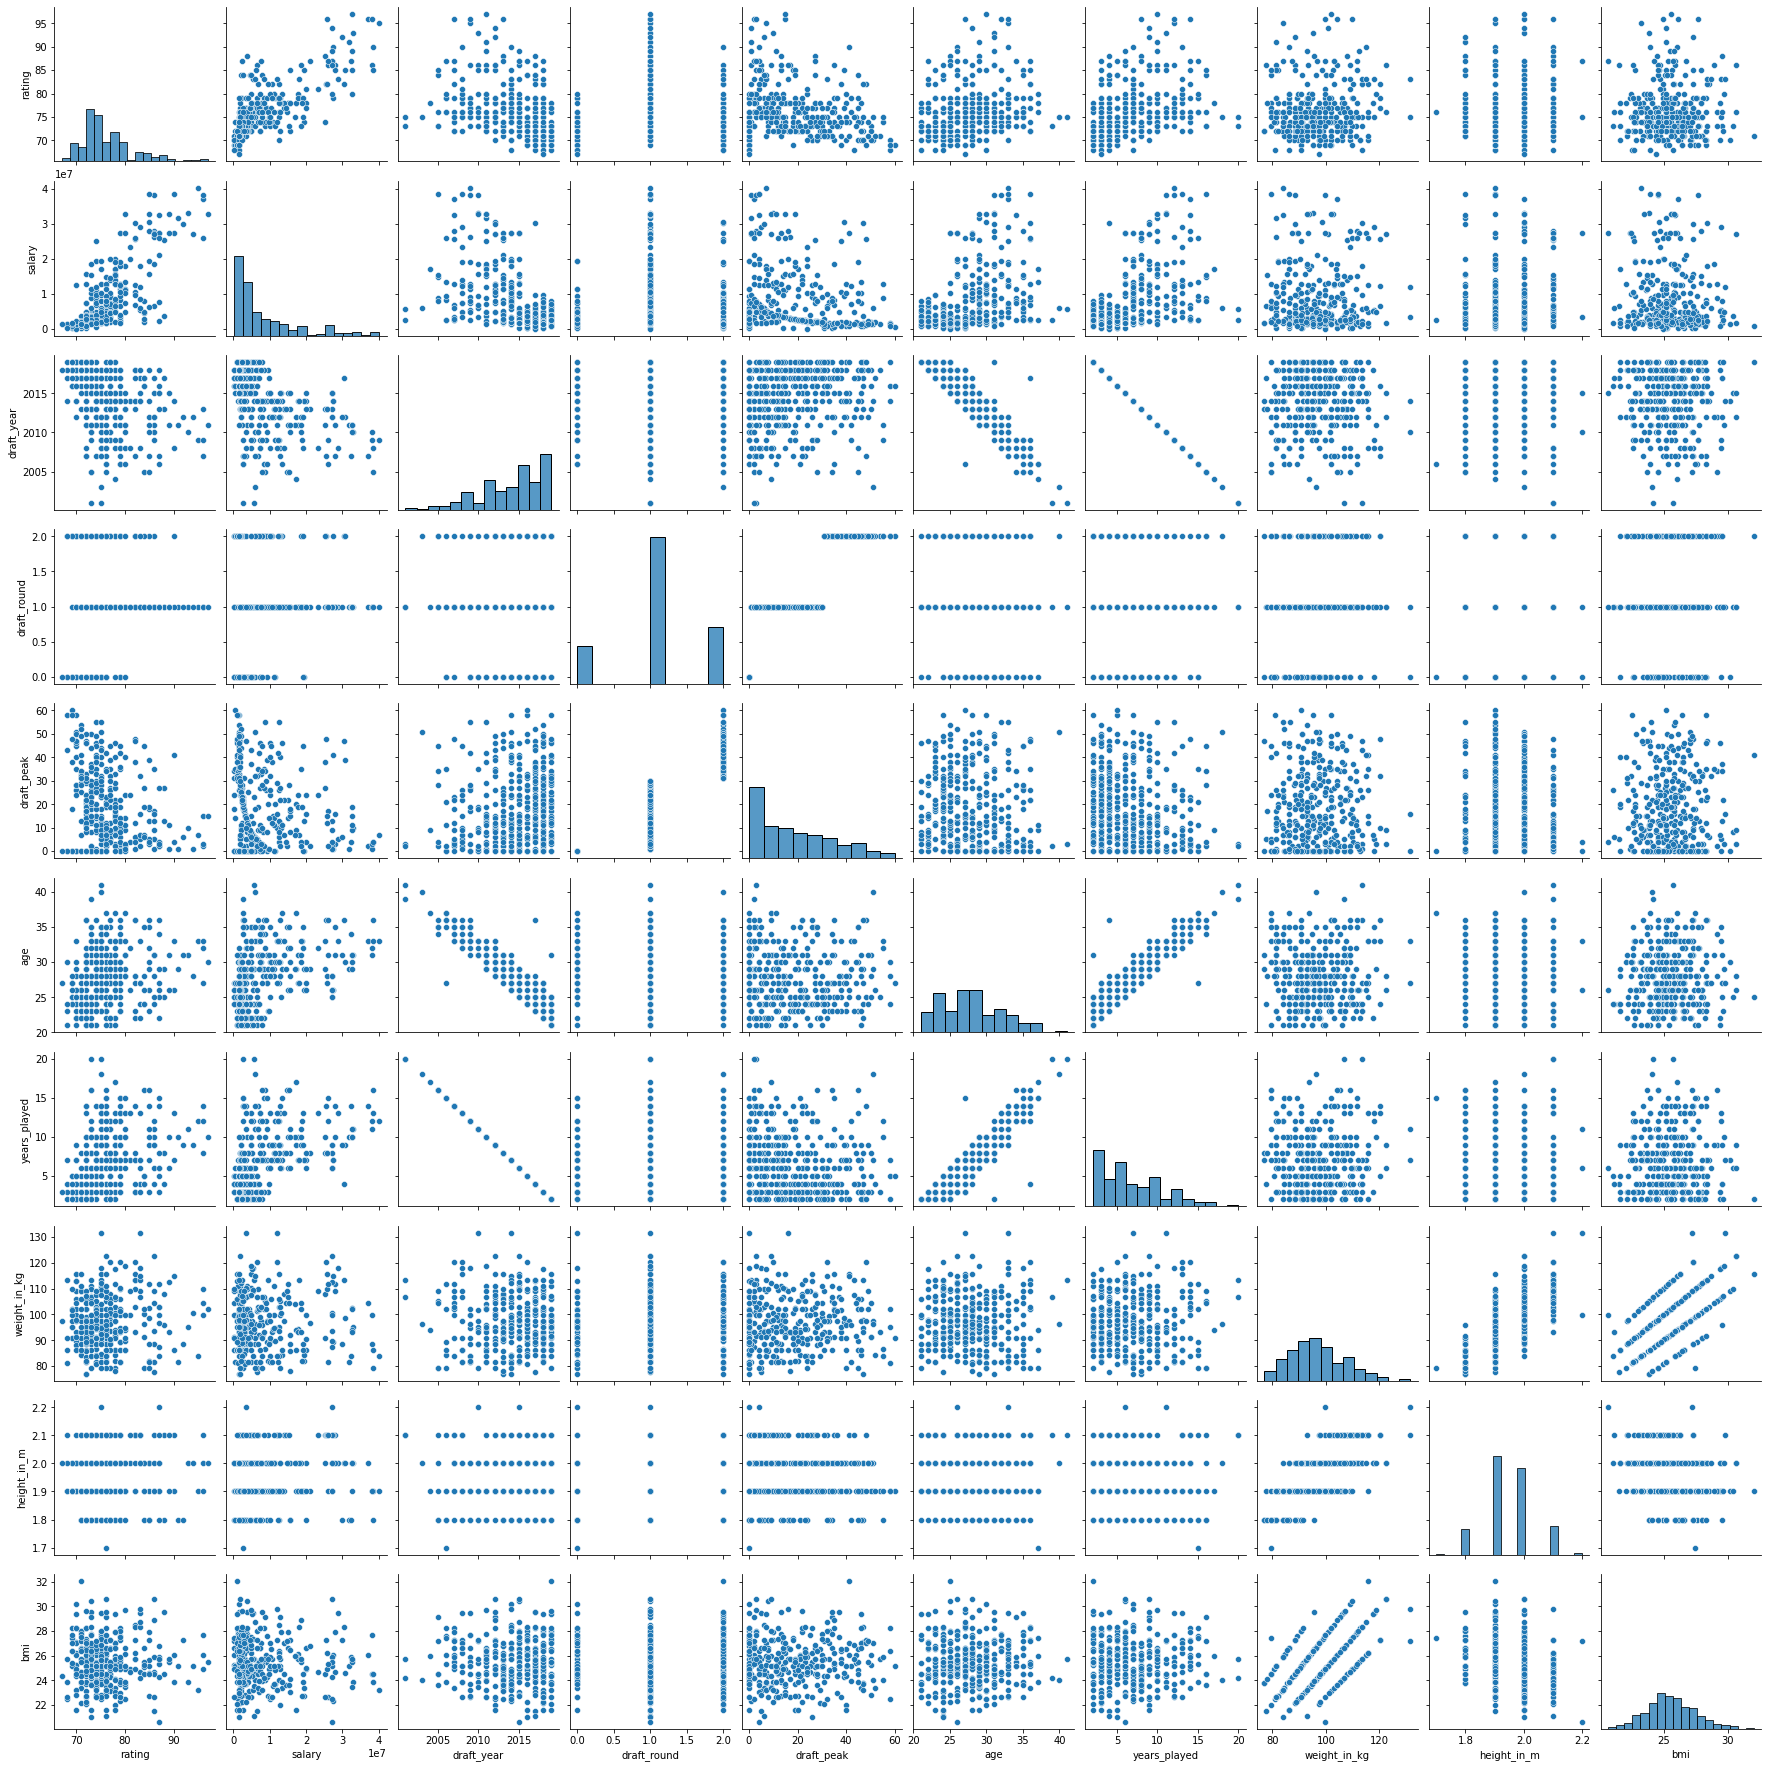

In [45]:
sns.pairplot(train)

<AxesSubplot:>

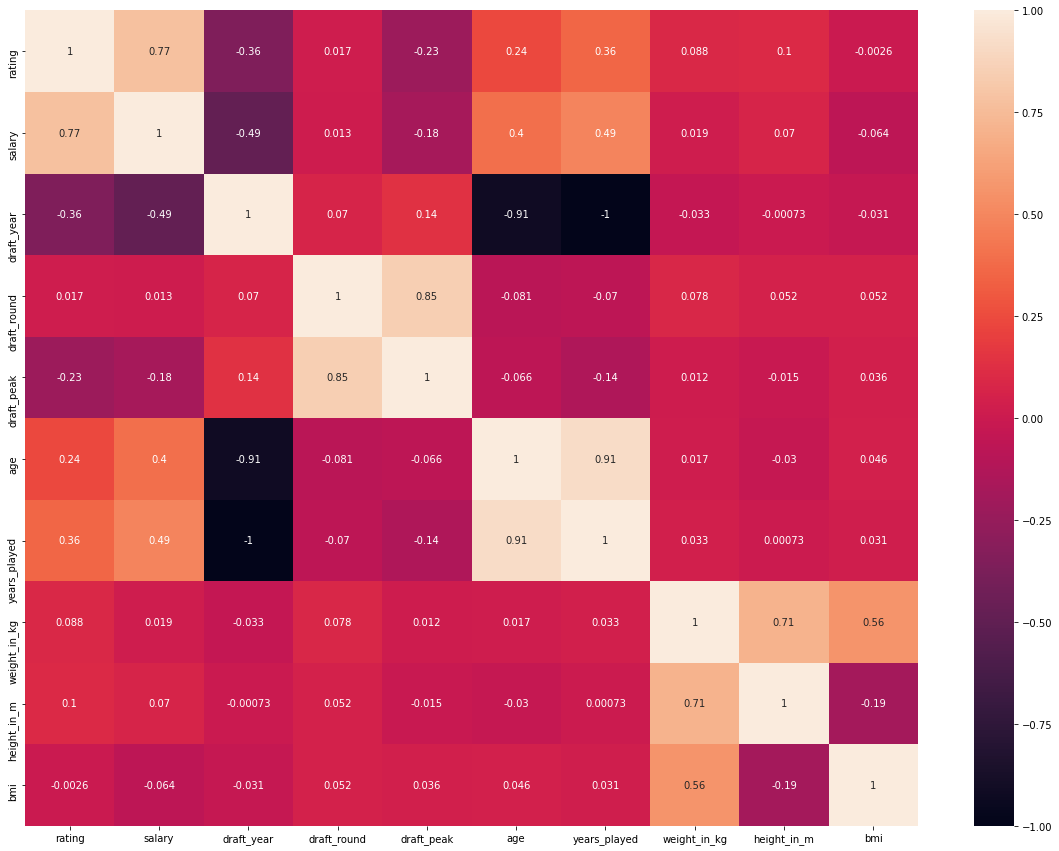

In [46]:
plt.figure(figsize=(20, 15))

sns.heatmap(corr_matrix, annot=True)

<Figure size 1440x720 with 0 Axes>

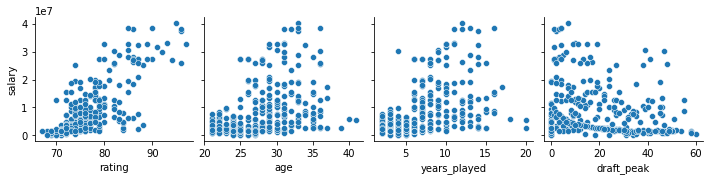

In [48]:
plt.figure(figsize=(20, 10))

sns.pairplot(train, x_vars = ['rating', 'age', 'years_played', 'draft_peak'], y_vars = ['salary'])

## ML Models

In [49]:
features = ['rating', 'age', 'years_played', 'draft_peak']
X_train = train[features]
y_train = train['salary']

let's scale the data

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

Let's decide the ML algorithms to use:
1. LinearRegression
2. DecisionTreesRegressor
3. RandomForestRegressor

### Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Let us calculate the rmse, and mae to evaluate how this model performed on the dataset 

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_train_predict = lin_reg.predict(X_train)

mse = mean_squared_error(y_train, y_train_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_predict)

print("RMSE: ", rmse)
print("MAE: ", mae)

RMSE:  5323142.967989355
MAE:  3933437.3429192146


the NBA players have a mean annual salary of 8.243 million. Our model computes a root-mean-square error of 5.323 million
let's try to see if other models will perform better

### Decision Tree Regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor

dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train)
y_train_predict = dec_reg.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
mae = mean_absolute_error(y_train, y_train_predict)
print("RMSE: ", rmse)
print("MAE: ", mae)

RMSE:  656611.3314568991
MAE:  70639.77939747328


The decision tree regressor seems to perform better on the dataset than the linear regression model. 

## Random Forests

In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_train_predict = forest_reg.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
mae = mean_absolute_error(y_train, y_train_predict)
print("RMSE: ", rmse)
print("MAE: ", mae)

RMSE:  1932828.572975654
MAE:  1124896.6110741822


It appears the DecisionTreeRegressor model did the best job at fitting our training dataset as it has the lowest rmse value of the three models. Let's use cross validation before we finetune our model

### Cross-validation

In [66]:
from sklearn.model_selection import cross_val_score

for regressor in (lin_reg, dec_reg, forest_reg):
    val_score = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
    
    val_score = np.sqrt(-val_score)
    print(regressor.__class__.__name__)
    print("Scores:", val_score)
    print("Mean:", val_score.mean())
    print("Standard deviation:", val_score.std())
    print('\n')
    

LinearRegression
Scores: [6867550.48086175 5307872.26444052 4147633.6531765  5299904.01606729
 4832567.20059917 4750877.52774123 4532279.01129047 4966245.95840411
 7349419.68458255 5448799.64418183]
Mean: 5350314.94413454
Standard deviation: 959322.0167917571


DecisionTreeRegressor
Scores: [8550000.05599474 6270419.66138509 5815749.74090312 6615923.44922017
 5264224.45911776 5950969.52308928 5341627.1859921  5824294.12973812
 7850133.12192389 5298558.66181106]
Mean: 6278189.998917533
Standard deviation: 1055374.3244077866


RandomForestRegressor
Scores: [6472555.68603543 4197115.31741899 3535703.31819095 6270268.9791313
 4623337.18681781 4260388.03894382 4488430.07318604 3929334.65781124
 6963660.63349471 5237864.06214763]
Mean: 4997865.795317791
Standard deviation: 1121615.6986132553




Random Forests performs best on the validation set as we have just evaluated. However, it seems to be overfitting the training set, since it has a lower rmse on the training set than on the validation set. Linear regression seems to properly fit the training set since the rmse score is similar on both training and validation sets. 

However, let's use the RandomForestRegressor since it has a lower rmse score on the 10 folds of validation set we have. 

## Fine-tune the model using gridsearch cv

In [68]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
             ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 10}

In [71]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=10)

In [73]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.57188007, 0.07965051, 0.25463929, 0.09383012])

According to this, the rating feature has the highest feature importance, then the years_played, then the draft_peak and finally age

## Evaluating on the test set

In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 421 to 17
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   full_name     86 non-null     object 
 1   rating        86 non-null     int64  
 2   jersey        86 non-null     object 
 3   position      86 non-null     object 
 4   salary        86 non-null     int64  
 5   country       86 non-null     object 
 6   draft_year    86 non-null     int64  
 7   draft_round   86 non-null     int64  
 8   draft_peak    86 non-null     int64  
 9   age           86 non-null     int64  
 10  years_played  86 non-null     int64  
 11  weight_in_kg  86 non-null     float64
 12  height_in_m   86 non-null     float64
 13  bmi           86 non-null     float64
dtypes: float64(3), int64(7), object(4)
memory usage: 10.1+ KB


In [76]:
X_test = test[features]
y_test = test['salary']

X_test = scaler.fit_transform(X_test)

Now, let's use the best model as evaluated by GridSearchCV on the test set

In [78]:
final_model = grid_search.best_estimator_

final_model.fit(X_test, y_test)
y_test_predict = final_model.predict(X_test)



print("Final rmse: ", np.sqrt(mean_squared_error(y_train, y_train_predict)))

Final rmse:  1932828.572975654


We have come to the end of the Machine Learning model training with sci-kit learn. :)